In [1]:
import sys
sys.path.append("..")
%cd ..

c:\Users\frede\OneDrive - Danmarks Tekniske Universitet\DTU\6. Semester\Bachelor2021


In [39]:
from sklearn.linear_model import LinearRegression
from DataPrep.ImportData import importer
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error
from Modelling import modelling
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
import pmdarima as pm
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from numpy import log
import numpy as np
import pandas as pd
from DataPrep.ImportData import importer
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings


In [3]:

m = modelling(shuffle=False)

In [54]:
y_org = importer().Import()[["Start Date","Energy (kWh)","Label"]]

In [56]:
#y_org=y_org[y_org["Start Date"].dt.year==2016]
y_org.index=y_org["Start Date"]
y_org=y_org.drop(columns=["Start Date"])
y_org=y_org[y_org["Label"]==0]
y_org=y_org.drop(columns=["Label"])
y_org

KeyError: 'Start Date'

In [57]:
y_org

,Energy (kWh)
Start Date,
2011-07-29,1.859748
2011-08-05,1.588462
2011-08-12,1.481392
2011-08-19,1.596167
2011-08-26,1.571692
...,...
2019-11-29,3.187976
2019-12-06,3.068462
2019-12-13,3.070113


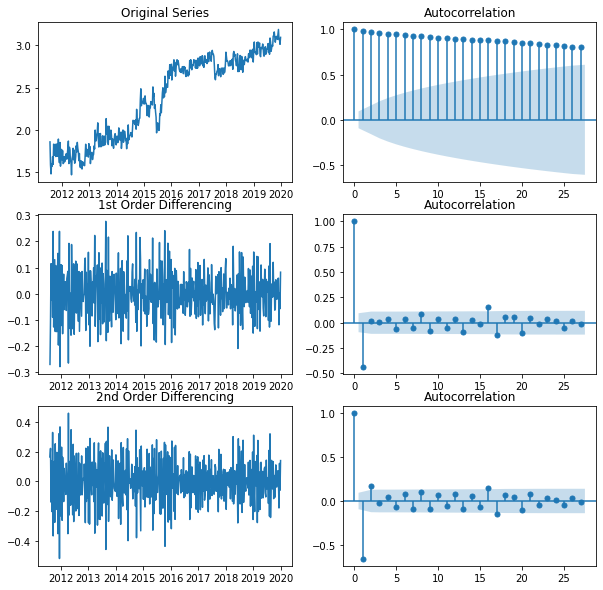

In [60]:
# Original Series

fig, axes = plt.subplots(3, 2, sharex=False, figsize=(10,10))
axes[0, 0].plot(y_org); axes[0, 0].set_title('Original Series')
plot_acf(y_org, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(y_org.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(y_org.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(y_org.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(y_org.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

In [59]:
y_diff=y_org.diff()

Text(0.5, 1.0, 'Autocorrelation plot')

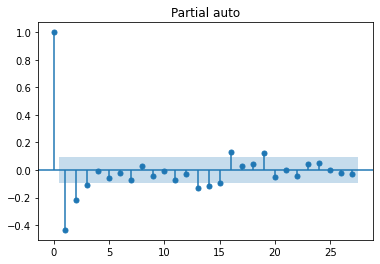

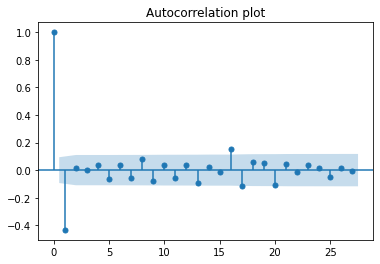

In [58]:
# Original Series

plot_pacf(y_diff.dropna())
plt.title('Partial auto')
plot_acf(y_diff.dropna())
plt.title("Autocorrelation plot")




In [63]:

result = adfuller(y_org.dropna())
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -0.369598
p-value: 0.915052


In [36]:
model = ARIMA(y_diff.dropna(), order=(2,0,4))
model_fit = model.fit()
print(model_fit.summary())

c:\Users\frede\OneDrive - Danmarks Tekniske Universitet\DTU\6. Semester\Bachelor2021\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)
c:\Users\frede\OneDrive - Danmarks Tekniske Universitet\DTU\6. Semester\Bachelor2021\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)
c:\Users\frede\OneDrive - Danmarks Tekniske Universitet\DTU\6. Semester\Bachelor2021\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  % freq, ValueWarning)
                               SARIMAX Results                                
Dep. Variable:           Energy (kWh)   No. Observations:                  439
Model:                 ARIMA(2, 0, 4)   Log Lik

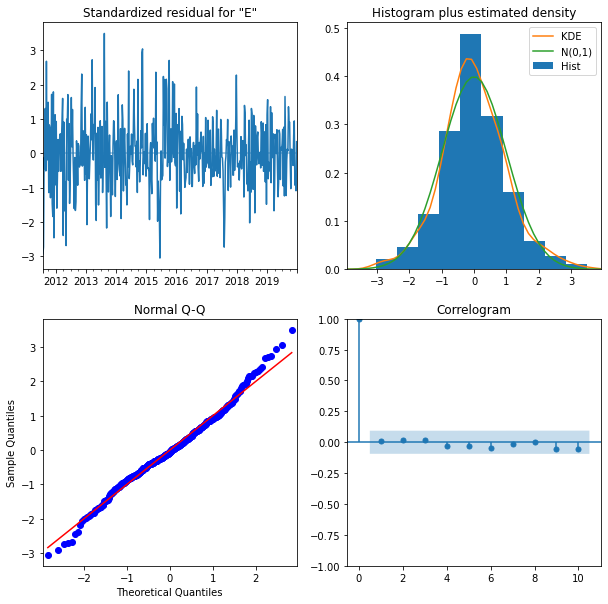

In [45]:
model_fit.plot_diagnostics(figsize=(10,10))
plt.show()

In [21]:
model = pm.auto_arima(y_org.dropna(), start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=5, max_q=5, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-948.851, Time=0.24 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-828.693, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-920.124, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-950.689, Time=0.09 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-830.298, Time=0.05 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=-948.852, Time=0.21 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=-946.920, Time=0.19 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=-949.276, Time=0.04 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0] intercept
Total fit time: 0.984 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  440
Model:               SARIMAX(0, 1, 1)   Log Likelihood                 478.345
Date:                Wed, 10 Mar 2021   AIC                           -950.689
Time:                        09:51:0

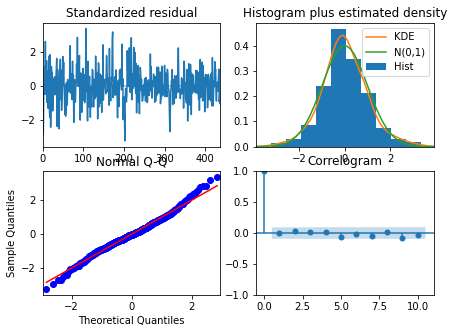

In [22]:
model.plot_diagnostics(figsize=(7,5))
plt.show()

In [23]:
y_exo = importer().Import()[["Start Date","Energy (kWh)","Label"]]

In [24]:
y_exo=y_exo[y_exo["Start Date"].dt.year==2016]
y_exo.index=y_exo["Start Date"]
y_exo=y_exo.drop(columns=["Start Date"])
#y_exo=y_exo[y_exo["Label"]==0]
#y_org=y_org.drop(columns=["Label"])
y_exo

,Energy (kWh),Label
Start Date,,
2016-01-01,2.707379,0
2016-01-02,4.738530,0
2016-01-03,2.849014,0
2016-01-04,6.069899,0
2016-01-05,4.148760,0
...,...,...
2016-12-27,5.205125,7
2016-12-28,5.068947,7
2016-12-29,5.628933,7


In [25]:
# SARIMAX Model with exogenious variable 
sxmodel = pm.auto_arima(y_exo["Energy (kWh)"], exogenous=y_exo[["Label"]],
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=None, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)

sxmodel.summary()

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[12] intercept   : AIC=inf, Time=10.43 sec
 ARIMA(0,0,0)(0,1,0)[12] intercept   : AIC=12193.282, Time=0.35 sec
 ARIMA(1,0,0)(1,1,0)[12] intercept   : AIC=11431.672, Time=2.66 sec
 ARIMA(0,0,1)(0,1,1)[12] intercept   : AIC=11014.104, Time=3.23 sec
 ARIMA(0,0,0)(0,1,0)[12]             : AIC=12191.832, Time=0.69 sec
 ARIMA(0,0,1)(0,1,0)[12] intercept   : AIC=12171.008, Time=0.76 sec
 ARIMA(0,0,1)(1,1,1)[12] intercept   : AIC=11016.103, Time=4.28 sec
 ARIMA(0,0,1)(0,1,2)[12] intercept   : AIC=11016.103, Time=12.04 sec
 ARIMA(0,0,1)(1,1,0)[12] intercept   : AIC=11439.988, Time=2.03 sec
 ARIMA(0,0,1)(1,1,2)[12] intercept   : AIC=11018.085, Time=12.89 sec
 ARIMA(0,0,0)(0,1,1)[12] intercept   : AIC=11114.313, Time=2.09 sec
 ARIMA(0,0,2)(0,1,1)[12] intercept   : AIC=10942.637, Time=4.73 sec
 ARIMA(0,0,2)(0,1,0)[12] intercept   : AIC=12169.242, Time=0.77 sec
 ARIMA(0,0,2)(1,1,1)[12] intercept   : AIC=10944.480, Time=5.68 sec
 ARIMA(0

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                 2901
Model:             SARIMAX(0, 0, 3)x(0, 1, [1], 12)   Log Likelihood               -5451.918
Date:                              Wed, 10 Mar 2021   AIC                          10915.836
Time:                                      09:12:44   BIC                          10951.648
Sample:                                           0   HQIC                         10928.743
                                             - 2901                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Label         -0.1713      0.109     -1.572      0.116      -0.385       0.042
ma.L1          0.1915      0.014     14.142      0.000       0.165       0.218
ma.L2          0.1638      0.016     10.110      0.000       0.132       0.196
ma.L3          0.1000      0.017      5.810      0.000       0.066       0.134
ma.S.L12      -0.7696      0.010    -75.492      0.000      -0.790      -0.750
sigma2         2.5412      0.028     92.010      0.000       2.487       2.595
===================================================================================
Ljung-Box (L1) (Q):                   0.36   Jarque-Bera (JB):             12914.88
Prob(Q):                              0.55   Prob(JB):                         0.00
Heteroskedasticity (H):               1.04   Skew:                             1.35
Prob(H) (two-sided):                  0.54   Kurtosis:                        13.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

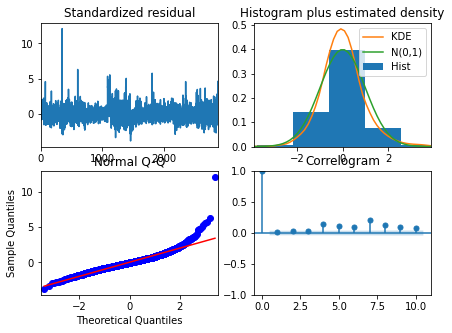

In [26]:
sxmodel.plot_diagnostics(figsize=(7,5))
plt.show()